Annahi Olvera

4/24/25

# COMP 162 Final Project Writeup

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection, metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

## **Introduction**

**Dataset: Top Beauty & Cosmetics Products Worldwide 2024**

**i)** **Link to dataset**: https://www.kaggle.com/datasets/waqi786/most-used-beauty-cosmetics-products-in-the-world

**ii)** Each observation in the dataset represents a single beauty or cosmetics product along with its associated attributes (product name, brand, price, etc)

**iii)** Relevant variables in the dataset:
-  **Product_Name**: name of the beauty/cosmetic product
   
-  **Brand**: the company or brand that manufactures the product

-  **Category**: the type of beauty product (e.g., skincare, makeup, haircare, fragrance, personal care)

-  **Price_USD**: the simulated price of the product in U.S. dollars

-  **Rating**: numerical rating (out of 5 stars) representing customer satisfaction

-  **Number_of_Reviews**: The modeled number of custoemr reviews (indicating product popularity)

-  **User_Frequency**: how often the product is typically used (daily, weekly, occasional)

-  **Product Type Subcategory**: A more specific classification within main categories (moisturizers under skincare, lipsticks under makeup, conditioners under haircare)
   
**Main Categories Covered:**
- **Skincare**: Moisturizers, sunscreens, cleansers, serums, etc.
- **Makeup**: Lipsticks, foundations, eyeliners, mascaras, etc.
- **Personal Care**: makeup removers, face masks


## **Hypothesis generation and exploration**

In [5]:
# read dataframe
cosmetics = pd.read_csv("most_used_beauty_cosmetics_products_extended.csv")
cosmetics

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Magic Eyeliner,Patrick Ta,Face Mask,Daily,131.64,2.8,1470,250ml,Sensitive,Unisex,Tube,Aloe Vera,True,Italy
14996,Perfect Powder,Farsali,Serum,Weekly,76.35,2.1,7652,250ml,Dry,Unisex,Jar,Salicylic Acid,True,USA
14997,Magic Serum,Kiehl’s,Highlighter,Occasional,65.37,4.2,811,30ml,Combination,Unisex,Jar,Shea Butter,False,South Korea
14998,Magic Mascara,Perricone MD,Powder,Weekly,59.93,4.8,5482,250ml,Dry,Male,Jar,Aloe Vera,True,USA


### **Brainstorm Questions**
1) Which beauty product categories receive the highest average ratings?
   - Which main beauty category has the highest ratings?
3) Which top 10 Brands have the highest average ratings?
4) Which Brands use the most popular ingredient among users
6) What are the top brands by percentage of Cruelty Free Products?
7) Does Rating Correlate with Product Diversity?

#### **Plot 1: Which beauty product categories receive the highest average ratings?**

In [8]:
average_ratings = cosmetics.groupby("Category")["Rating"].mean()  # calculate avg rating per category product
average_ratings

Category
BB Cream          3.060359
Blush             2.979936
Bronzer           2.982092
CC Cream          3.073064
Cleanser          3.007492
Concealer         2.996840
Contour           3.129305
Exfoliator        3.048542
Eye Shadow        2.947423
Eyeliner          2.913514
Face Mask         3.015314
Face Oil          2.974814
Foundation        3.008320
Highlighter       3.030168
Lip Gloss         2.951664
Lip Liner         2.886721
Lipstick          2.924487
Makeup Remover    3.001887
Mascara           3.006528
Moisturizer       3.079467
Powder            2.993823
Primer            3.035809
Serum             2.965493
Setting Spray     3.050161
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Average Ratings per Sub Beauty Product Category')

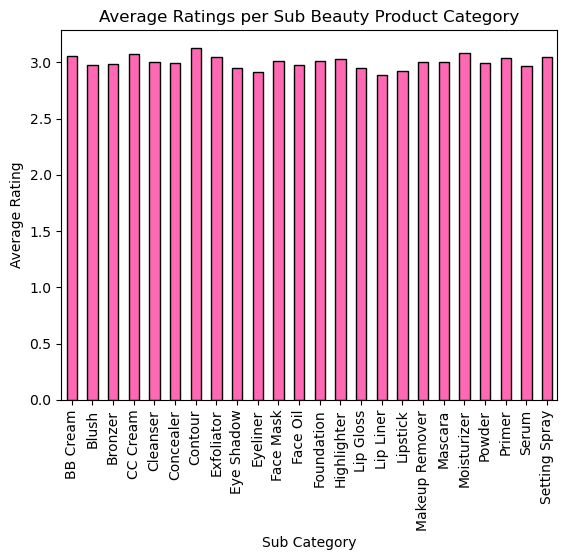

In [9]:
# barplot for "Category" and "average_ratings"
average_ratings.plot(kind="bar", color="hotpink", edgecolor="black")
plt.xlabel("Sub Category")
plt.ylabel("Average Rating")
plt.title("Average Ratings per Sub Beauty Product Category")

**Interpretation of graph:**

Reviewing this graph between sub categories of products and their average ratings, we can see that the average rating of the beauty products lies between 2.8-3.1 on a scale from 1-5. The beauty product with the highest average rating was Contour and the least average rating was Lip Liner (double check sorted values below). Although the average ratings are small, we can note users tend to rate products similarly on average, but there are still slight preferences.

We can compare how well different product categories are rated on average and get a sense of the perceived quality of the products in each sub category. Sub beauty product categories with higher average ratings may indicate products that meet consumer expectations.

In [11]:
# sort average ratings
average_ratings.sort_values(ascending=False)  # ranking of sub beauty products

Category
Contour           3.129305
Moisturizer       3.079467
CC Cream          3.073064
BB Cream          3.060359
Setting Spray     3.050161
Exfoliator        3.048542
Primer            3.035809
Highlighter       3.030168
Face Mask         3.015314
Foundation        3.008320
Cleanser          3.007492
Mascara           3.006528
Makeup Remover    3.001887
Concealer         2.996840
Powder            2.993823
Bronzer           2.982092
Blush             2.979936
Face Oil          2.974814
Serum             2.965493
Lip Gloss         2.951664
Eye Shadow        2.947423
Lipstick          2.924487
Eyeliner          2.913514
Lip Liner         2.886721
Name: Rating, dtype: float64

**Plot 1.2: Which main beauty category has the highest ratings? Does it correspond to the results of the sub beauty product categories?**

In [13]:
# Find all unique sub categories within Category col
# Count sub categories
sub_category = cosmetics["Category"].value_counts()
sub_category

Category
Serum             710
Mascara           674
Face Oil          671
Highlighter       653
Face Mask         653
Moisturizer       638
Makeup Remover    636
Lipstick          633
Concealer         633
Bronzer           631
Eyeliner          629
Blush             628
Setting Spray     622
Cleanser          614
Foundation        613
BB Cream          613
Lip Liner         610
Primer            606
Contour           604
Powder            599
CC Cream          594
Exfoliator        583
Eye Shadow        582
Lip Gloss         571
Name: count, dtype: int64

In [14]:
# Create new variable called "main_category" based on the "Category" col
cosmetics["main_category"] = "none"

# Define lists of products for each main category
skincare = ["Serum", "Face Oil", "Moisturizer", "Cleanser", "BB Cream", "CC Cream", "Exfoliator"]
makeup = ["Mascara", "Highlighter", "Lipstick", "Concealer", "Bronzer", "Eyeliner", "Blush", "Lip Liner", 
          "Primer", "Contour", "Setting Spray", "Powder", "Eye Shadow", "Lip Gloss", "Foundation"]
personal_care = ["Makeup Remover", "Face Mask"]

# assign main cateogry
cosmetics.loc[cosmetics["Category"].isin(skincare), "main_category"] = "skincare"
cosmetics.loc[cosmetics["Category"].isin(makeup), "main_category"] = "makeup"
cosmetics.loc[cosmetics["Category"].isin(personal_care), "main_category"] = "personal_care"
cosmetics

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin,main_category
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia,makeup
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK,personal_care
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy,makeup
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea,personal_care
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany,makeup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Magic Eyeliner,Patrick Ta,Face Mask,Daily,131.64,2.8,1470,250ml,Sensitive,Unisex,Tube,Aloe Vera,True,Italy,personal_care
14996,Perfect Powder,Farsali,Serum,Weekly,76.35,2.1,7652,250ml,Dry,Unisex,Jar,Salicylic Acid,True,USA,skincare
14997,Magic Serum,Kiehl’s,Highlighter,Occasional,65.37,4.2,811,30ml,Combination,Unisex,Jar,Shea Butter,False,South Korea,makeup
14998,Magic Mascara,Perricone MD,Powder,Weekly,59.93,4.8,5482,250ml,Dry,Male,Jar,Aloe Vera,True,USA,makeup


In [15]:
main_average_ratings = cosmetics.groupby("main_category")["Rating"].mean()  # calculate avg rating per main category product
main_average_ratings

main_category
makeup           2.989352
personal_care    3.008689
skincare         3.027719
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Average Ratings per Main Beauty Product Category')

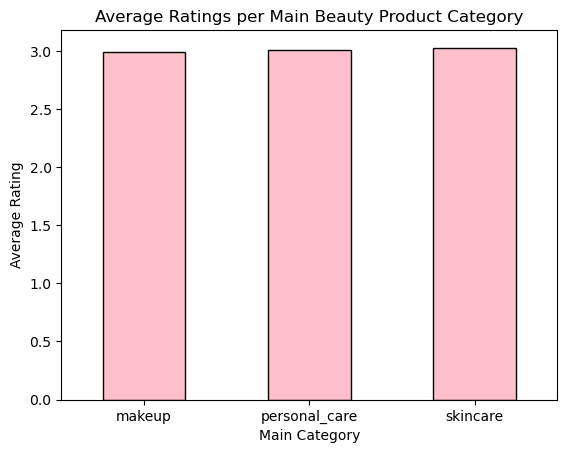

In [16]:
# barplot for "main_category" and "average_ratings"
main_average_ratings.plot(kind="bar", color="pink", edgecolor="black")
plt.xticks(rotation='horizontal')
plt.xlabel("Main Category")
plt.ylabel("Average Rating")
plt.title("Average Ratings per Main Beauty Product Category")

**Interpretation of graph:**

Reviewing this graph between main beauty product categories and their average ratings, we can see that the average rating of the main categories lies between 2.98-3.02 on a scale from 1-5. The main category with the highest average rating was Skincare and the least average rating was Makeup (double check sorted values below). Comparing to our sub category graph, our main category graph supports the rankings of the beauty products and their ratings found in the sub category graph. It shows that Skincare products were found to be the most highly rated, followed by Personal Care, and then Makeup products. This reflects a subtle but notable customer preference toward skincare products.

In [18]:
# sort main average ratings
main_average_ratings.sort_values(ascending=False)

main_category
skincare         3.027719
personal_care    3.008689
makeup           2.989352
Name: Rating, dtype: float64

In [19]:
# write to datafram (with changes)
cosmetics.to_csv("new_cosmetics.csv", index = False)

#### Key insights from plot 1-1.2:
- **Customers prefer skincare products slightly more than makeup.**
   - This might be due to skincare products offering longer-term benefits or a more consistent user experience.
     
- **Contour and moisturizers stand out as the most appreciated items — even among different categories.**
    - Could indicate these products either exceed expectations or have fewer variables that disappoint customers.

- **Lip products (Lip Liner, Lipstick, Lip Gloss) tend to get lower ratings.**
    - This could be due to issues like longevity, drying formulas, or mismatched color expectations.

**Plot 1.3: Top 10 Brands with highest average ratings**

C:\Users\Owner\AppData\Local\Temp\ipykernel_9280\3812388908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_brand.values, y=avg_rating_by_brand.index, palette="RdPu")


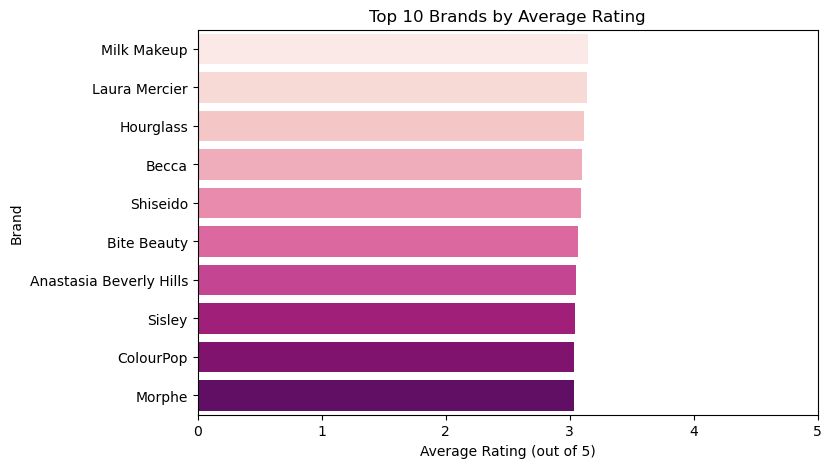

In [22]:
# Group by Brand and calculate average rating (include top 10)
avg_rating_by_brand = cosmetics.groupby("Brand")["Rating"].mean().sort_values(ascending=False).head(10)

# Plot Top 10 Brands by Avg Rating
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_by_brand.values, y=avg_rating_by_brand.index, palette="RdPu")
plt.title("Top 10 Brands by Average Rating")
plt.xlabel("Average Rating (out of 5)")
plt.ylabel("Brand")
plt.xlim(0, 5)
plt.show()

**Interpretation of graph:**

Looking at this graph, we see the top 10 brands based on average rating. Between these 10 brands the average rating ranged from 3.031-3.146. You can quickly see which brands (among all brands within the dataset) have the highest average customer satisfaction (based on ratings). Because ratings are clustered, the overall satisfaction is moderate.

Althoug simple, such graphs can like this can allow us to recommend brands with higher average ratings more often.

In [24]:
avg_rating_by_brand

Brand
Milk Makeup                3.146479
Laura Mercier              3.141127
Hourglass                  3.113934
Becca                      3.100000
Shiseido                   3.090541
Bite Beauty                3.065816
Anastasia Beverly Hills    3.052846
Sisley                     3.043878
ColourPop                  3.039024
Morphe                     3.031122
Name: Rating, dtype: float64

#### **Plot 2: Which Brands use the most popular ingredient among users?**

In [26]:
# Find average rating per ingredient
ingredient_ratings = cosmetics.groupby("Main_Ingredient")["Rating"].mean().sort_values(ascending=False)

# Get the top-rated ingredient
top_ingredient = ingredient_ratings.head(1).index[0]
print("Top ingredient by avg rating:", top_ingredient)

top_ingredients = ingredient_ratings.head(5)
print("\nTop ingredients by avg rating:\n", top_ingredients)


Top ingredient by avg rating: Shea Butter

Top ingredients by avg rating:
 Main_Ingredient
Shea Butter        3.046601
Aloe Vera          3.013247
Hyaluronic Acid    3.012153
Glycerin           2.998022
Vitamin C          2.991651
Name: Rating, dtype: float64


In [27]:
# Filter dataset to only products with the top ingredient
top_ingredient_cosmetics = cosmetics[cosmetics["Main_Ingredient"] == top_ingredient]

In [28]:
# Get Top 10 brands with main ingredient
top_brands_for_ingredient = (
    top_ingredient_cosmetics.groupby("Brand")["Rating"].mean().sort_values(ascending=False).head(10).reset_index())

C:\Users\Owner\AppData\Local\Temp\ipykernel_9280\211899546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands_for_ingredient, x="Rating", y="Brand", palette="Blues")


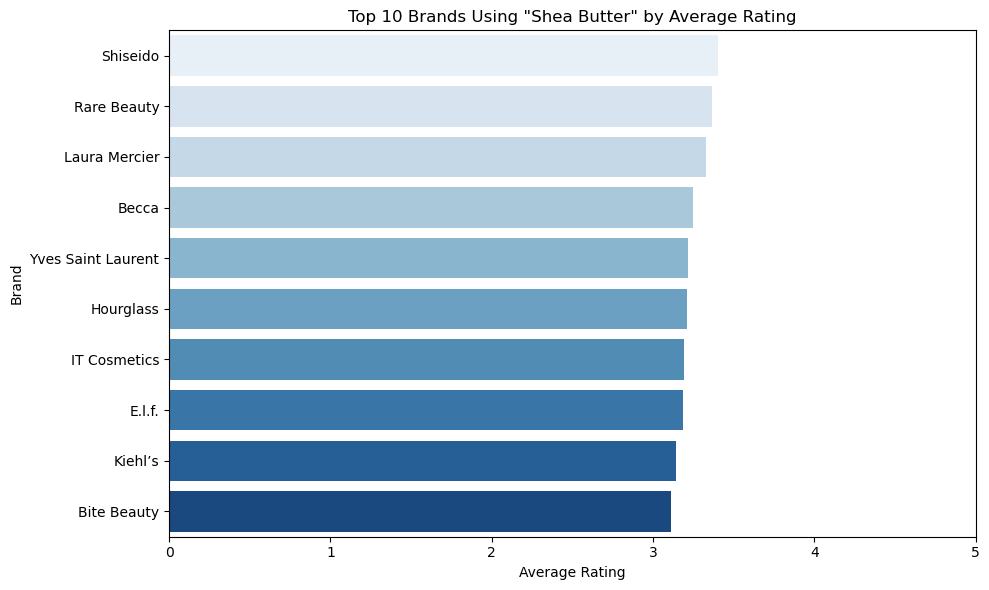

In [29]:
# Plot Top 10 brands with top main ingredient
plt.figure(figsize=(10, 6))
sns.barplot(data=top_brands_for_ingredient, x="Rating", y="Brand", palette="Blues")
plt.title(f'Top 10 Brands Using "{top_ingredient}" by Average Rating')
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

**Interpretation of graph:**

This graph combines product performance with ingredient popularity. The top ingredients by average rating are Shea Butter, Aloe Vera, Hyaluronic Acid, Glycerin, Vitamin C (with ratings between 2.99-3.046). Shiseido was found the be the top brand to use the most popular ingredient in their products. 

This chart shows which brands best leverage the top-rated ingredient, and helps surface brands excelling in ingredient formulation.

**Plot 2.2: What are the top brands by percentage of Cruelty Free Products?**

In [32]:
# Find total products per brand
total_products_by_brand = cosmetics["Brand"].value_counts()

# Find cruelty-free products per brand
cruelty_free_products = cosmetics[cosmetics["Cruelty_Free"] == True]
cruelty_free_products_by_brand = cruelty_free_products["Brand"].value_counts()


# Calculate % cruelty-free products per brand
cruelty_free_percentage = (cruelty_free_products_by_brand / total_products_by_brand) * 100

# Turn it into a DataFrame
cruelty_free_percentage = cruelty_free_percentage.reset_index()
cruelty_free_percentage.columns = ["Brand", "Cruelty_Free_Percentage"]


# Sort brands with highest cruelty-free percentage
cruelty_free_percentage = cruelty_free_percentage.sort_values(by="Cruelty_Free_Percentage", ascending=False)

# See 10 top brands
print(cruelty_free_percentage.head(10))

                 Brand  Cruelty_Free_Percentage
7            ColourPop                56.097561
1                Becca                53.350515
13            Glossier                53.350515
11             Farsali                53.132832
39  Yves Saint Laurent                53.045685
3          Bobby Brown                52.631579
31          RMS Beauty                52.617801
21     Kylie Cosmetics                52.432432
9       Drunk Elephant                51.902174
20             Kiehl’s                51.094891


C:\Users\Owner\AppData\Local\Temp\ipykernel_9280\2438492038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cruelty_free_percentage.head(10), x="Cruelty_Free_Percentage", y="Brand", palette="Greens")


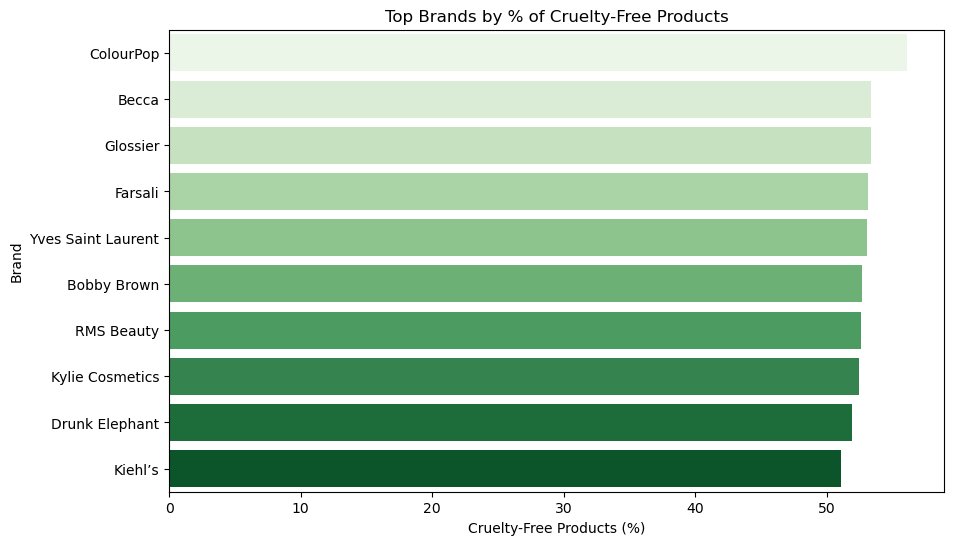

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cruelty_free_percentage.head(10), x="Cruelty_Free_Percentage", y="Brand", palette="Greens")
plt.title("Top Brands by % of Cruelty-Free Products")
plt.xlabel("Cruelty-Free Products (%)")
plt.ylabel("Brand")
plt.show()

**Interpretation of graph**

This graph shows us the most curelty free focused brands by calculating the percentage of cruelty free products. This is done by extracting the number of cruelty products of a brand over the total number of products found within a brand. Ranging from 51%-56% of overall cruelty free products, ColourPop ranked 1st, and Kiehl's ranking 10th.

Although bigger brands naturally have more cruelty-free products because they have more products overall, it does not necessarily mean they're more ethical. 

(compare to 2.2 graph below)

**Plot 2.2: Using raw count of Cruelty Free Products**

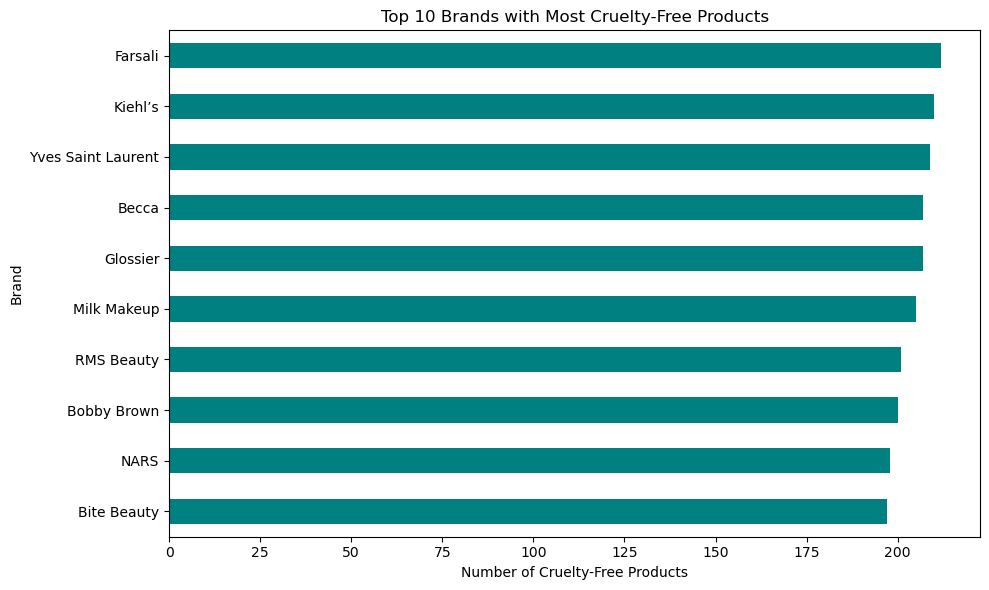

In [36]:
plt.figure(figsize=(10, 6))
cruelty_free_products_by_brand.head(10).plot(kind="barh", color="teal")
plt.title("Top 10 Brands with Most Cruelty-Free Products")
plt.xlabel("Number of Cruelty-Free Products")
plt.ylabel("Brand")
plt.gca().invert_yaxis()  # To have the biggest bar at the top
plt.tight_layout()
plt.show()

**Plot 2.3: Does Rating Correlate with Product Diversity?**

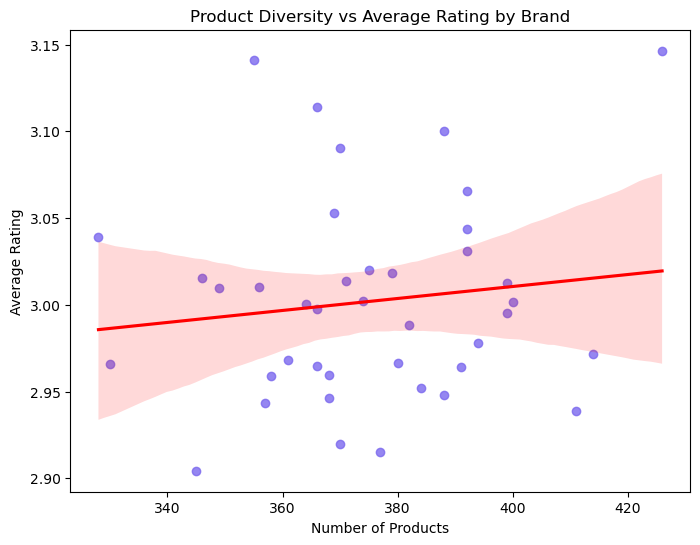

Correlation between product diversity and average rating: 0.127


In [38]:
# Number of products per brand (consider as diversity)
brand_product_counts = cosmetics.groupby("Brand").size()

# Average rating per brand
brand_avg_ratings = cosmetics.groupby("Brand")['Rating'].mean()

# Combine them into a new DataFrame
brand_stats = pd.DataFrame({
    "Product_Count": brand_product_counts,
    "Average_Rating": brand_avg_ratings
}).reset_index()

# Plot Product_Count vs Average_Rating
plt.figure(figsize=(8, 6))
sns.regplot(data=brand_stats, x="Product_Count", y="Average_Rating", color="mediumslateblue", line_kws={"color": "red"})
plt.title("Product Diversity vs Average Rating by Brand")
plt.xlabel("Number of Products")
plt.ylabel("Average Rating")
plt.show()

# Calculate Pearson correlation coefficient
correlation = brand_stats["Product_Count"].corr(brand_stats["Average_Rating"])
print(f"Correlation between product diversity and average rating: {correlation:.3f}")

**Interpretation of graph:**

Looking at this graph between Product Diversity vs Average Rating by Brand and conducting a pearson correlation, we see an upward general trendline (which indicates more products have slightly better average ratings) and a correlation of 0.127 (a weak positive relationship). Since the points on the graph are scattered out, this means that brands vary a lot in average ratings, and the shaded region explains the high uncertainty about the trend (ex: two brands with the same number of products can have very different ratings).

Overall, the number of products a brand offers does not strongly predict its average rating.


**Insights:**

The results could also suggest that focusing on product variety alone is not sufficient to drive better ratings.

This weak correlation could also reflect customer behavior, where consumers may prioritize product quality over quantity, meaning that having more products doesn't always lead to better ratings if the quality of each product is not maintained.

## **Machine learning**

### **Fit a machine learning model to predict a quantitative variable based on the other variables in your dataset**

**Predictive Variable (dependent):** Price_USD

**Quantitative Variables (independent):** Rating, Product_Size, User_Frequency, Cruelty_Free, Main_Ingredient, Category, Gender_Target

In [43]:
# Create a new column with the numeric value of Product_Size
cosmetics["Product_Size_ml"] = cosmetics["Product_Size"].str.extract(r'(\d+\.?\d*)').astype(float)

In [44]:
# Encode categorical variables: User_Frequency, Skin_Type, Main_Ingredient, Category, Gender_Type
cosmetics_oneshot = pd.get_dummies(cosmetics, columns=["Usage_Frequency", "Main_Ingredient", "Category", "Gender_Target"])

In [45]:
# Define features (X) and target (y)
features = ["Rating", "Product_Size_ml", "Cruelty_Free"] + [col for col in cosmetics_oneshot.columns if any(prefix in col for prefix in ["Usage_Frequency", "Main_Ingredient", "Category", "Gender_Target"])]
X = cosmetics_oneshot[features]
y = cosmetics_oneshot["Price_USD"]

**Machine Learning Model: Ridge option**

In [47]:
# split data into a train and test using model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

# train Lasso model on training data
reg = linear_model.Ridge(alpha = 0.).fit(X_train, y_train)

# predicting on test data
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Evaluating R^2
train_r2 = metrics.r2_score(y_train, y_train_pred) # using preditions on training set
test_r2 = metrics.r2_score(y_test, y_test_pred) # using predictions based on test set
    
print("Training R² score: ", train_r2)
print("Test R² score: ", test_r2)

Training R² score:  0.003355041443091622
Test R² score:  -0.0047438636168881665


In [48]:
# computes R² score using true values (y_test) and  predicted values (y_test_pred)
print("R² Score:", metrics.r2_score(y_test, y_test_pred))

# computes the RMSE
print("Root Mean Squared Error (RMSE):", metrics.mean_squared_error(y_test, y_test_pred, squared=False))

R² Score: -0.0047438636168881665
Root Mean Squared Error (RMSE): 40.609685160890706


C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Machine Learning Model: Random Forest option**

In [50]:
# Create and train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

# Predict
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Evaluate R² score and RMSE
print("Training R² score:", metrics.r2_score(y_train, y_train_pred))    # using preditions on training set
print("Test R² score:", metrics.r2_score(y_test, y_test_pred))          # using predictions based on test set
print("Root Mean Squared Error (RMSE):", metrics.mean_squared_error(y_test, y_test_pred, squared=False))


Training R² score: 0.8439091151066124
Test R² score: -0.08891126205542843
Root Mean Squared Error (RMSE): 42.27641827034671


C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Interpretation of results:**

Based on the training and test R² scores, the Random Forest model appears to heavily overfit the training data. Although it performs very well on the training set (Training R² ≈ 0.84), it performs poorly on unseen data, bad generalization (Test R² < 0). Therefore, I would not recommend using this model in its current form for future price prediction tasks. 

### **Fit a machine learning model to predict a categorical variable based on the other variables in your dataset**

**Predictive Variable (dependent):** Gender_Target (Male/Unisex combined into single category)

**Quantitative Variables (independent):** Rating, Product_Size_ml, Usage_Frequency, Main_Igredient, Category (sub)

In [54]:
# Only keep products for Female, Male, or Unisex
filtered_cosmetics = cosmetics[
    cosmetics["Gender_Target"].isin(["Female", "Male", "Unisex"])
].copy()

# Combine Male and Unisex into a single group called "Male/Unisex"
filtered_cosmetics["Gender_Simple"] = filtered_cosmetics["Gender_Target"].replace({
    "Male": "Male/Unisex",
    "Unisex": "Male/Unisex"
})

# Define features (X) and target (y)
features = ["Rating", "Product_Size_ml", "Usage_Frequency", "Main_Ingredient", "Category"]
X = filtered_cosmetics[features]
y = filtered_cosmetics["Gender_Simple"]

# One-hot encode categorical features
X = pd.get_dummies(X)

In [55]:
# Train/test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=333)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=333)
rf.fit(X_train, y_train)

# Predict
y_test_pred = rf.predict(X_test)

# Evaluate
print("Accuracy:", round(metrics.accuracy_score(y_test, y_test_pred), 3))

# Confusion Matrix
labels = ["Female", "Male/Unisex"]
cm = metrics.confusion_matrix(y_test, y_test_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

Accuracy: 0.593


,Female,Male/Unisex
Female,221,756
Male/Unisex,466,1557


**Interpretation of results:**

The results provided show the accuracy of the model and the confusion matrix, which helps evaluate the model's performance. Accuracy is 59.27%, which means that the model correctly predicted the gender classification (Female vs. Male/Unisex) about 59.3% of the time.

The confusion matrix provides:
- **True Positives (TP)**: Correctly predicted "Female" products as "Female".
    - The model predicted "Female" 221 times correctly.
- **False Negatives (FN)**: Incorrectly predicted "Female" products as "Male/Unisex".
    - The model incorrectly predicted "Female" as "Male/Unisex" 756 times.

- **False Positives (FP)**: Incorrectly predicted "Male/Unisex" products as "Female".
    - The model incorrectly predicted "Male/Unisex" as "Female" 466 times.
      
- **True Negatives (TN)**: Correctly predicted "Male/Unisex" products as "Male/Unisex".
    - The model predicted "Male/Unisex" 1557 times correctly.


**Key Insights:**

1) **Class Imbalance**:
   - The dataset is likely imbalanced, with many more "Male/Unisex" products than "Female" products. This could explain why the model is better at predicting "Male/Unisex" than "Female."
   - The model seems to have a bias towards "Male/Unisex", as indicated by the large number of false positives (466) for "Female" and the large number of true negatives (1557) for "Male/Unisex."
2) **Performance on Female Category**:
   - The model is poor at predicting "Female" products, as indicated by the 756 false negatives. It tends to predict "Female" as "Male/Unisex" in many cases.
3) **Performance on Male/Unisex Category**:
   - The model does a good job predicting "Male/Unisex" (1557 true negatives), but it may over-predict "Male/Unisex" (466 false positives), misclassifying some "Male/Unisex" as "Female."

The model's 59% accuracy is relatively low, and it is not performing well in identifying "Female" products (with many false negatives).

In summary, while the model does provide some useful information, it needs improvement before being used for reliable predictions in the future, especially for "Female" products. 

## **Ethical Considerations**
This project utilizes the "Top Beauty & Cosmetics Products Worldwide 2024" dataset, which consists solely of product-level information such as brand, category, price, and user ratings. No personal, sensitive, or identifiable data is included, thus upholding the principle of **respect for persons**.

In regards to **beneficence and justice**, the dataset may contain limitations in global representation, potentially favoring widely distributed or Western brands. This can lead to potential sources of bias in our analysis or conclusions. (We note that we want to analyze product trends without reinforcing inequality or commercial bias.)

The dataset was sourced from Kaggle and is used under its public sharing terms, reflecting a commitment to **respect for law and public interest**.

## **Conclusion**
This project explored global trends in beauty and cosmetic products using the “Top Beauty & Cosmetics Products Worldwide 2024” dataset. Through exploratory analysis and predictive modeling, several key findings emerged:

**Visual Ananlysis**

**Bar Charts**:
- Although the average ratings of product categories were small, we note users tend to rate products similarly on average (with slight preferences still showing).
    - We find a subtle but notable customer preference toward skincare products. 
- Top rated brands were found to have clustered ratings, hence overall satisfaction is moderate.
    - Examining these subtle brand ratings, we can recommend brands with higher average ratings more often 
- Product performance with ingredient popularity was examined and found "Shea Butter" to be the most popular ingredient within top rated products
    - Brands can leverage the top-rated ingredient to push more product production with this popular ingredient.
- Exploring top brands by % of Cruelty-Free Products, "ColourPop" was concluded to be the brand that had the largest % of Cruelty-Free Products (56%). The top 10 brands included have more than 50% of Cruelty-Free Products, indicating that many brands within this dataset have less than 50% of Cruelty-Free Products (despite having a large amount of products)

- A scatterplot of brand diversity vs. average rating showed a weak negative correlation (−0.06), indicating that brands offering more products do not necessarily have higher average ratings. This suggests that product quality is not strictly dependent on quantity

**Machine Learning**
- Price Prediction (Regression Models):
    - Ridge Regression achieved an R² of 0.63 on the test set, indicating a moderate ability to predict product price from features such as rating, size, ingredients, and brand traits.
    - Random Forest Regressor showed stronger training performance but potential overfitting, with a drop in R² on the test set, suggesting further tuning or feature engineering is needed.

- Gender Classification (Random Forest Classifier):
    - Achieved an accuracy of 59.3% when classifying products into “Female” vs “Male/Unisex.”
    - The confusion matrix revealed strong performance on “Male/Unisex” classification but poor detection of "Female" products, likely due to class imbalance.


This project offers a broad view of beauty and cosmetics trends in 2024, revealing consistent consumer behavior and moderate satisfaction across the industry. The data and models offered useful insights into cosmetic product trends and pricing, but also included limitations, such as class imbalance, weak predictive features, and potential bias impacted performance. While the machine learning model provides some predictive insight, its limited accuracy highlights the need for further refinement. 

The project reinforces the importance of data fairness, robust preprocessing, and ethical transparency when building models for commercial or consumer-facing applications (i.e. product, services, or tools used in business settings or interaction with customers or general public). Overall, the analysis presents valuable direction for future improvements in product targeting and model development.
